# Python ile Veri Görselleştirme
Bu proje kredi kartı kullanımı verisi üzerinden analiz yapmayı amaçlar. Pandas ve Matplotlib kütüphaneleri kullanılmıştır.

In [1]:
# Kütüphaneleri yükleyelim:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Aşama: Veri Yükleme ve Temizleme

Önce veri setimizi yükleyelim ve ilk beş girdisine göz atalım. Bu noktada amacımız verileri yorumlamak için kullanmaya ihtiyaç duymadığımız veya girdi verilmemiş sütunları belirlemek.

In [2]:
transactions_path = "transactions.csv"
users_path = "users.csv"

transactions_data = pd.read_csv(transactions_path)
users_data = pd.read_csv(users_path)

users_data.head()

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
transactions_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,102,0,2002,9,1,06:21,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,435,0,2002,9,1,06:42,5.59,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,348,0,2002,9,2,06:22,132.12,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,270,0,2002,9,2,17:45,60.91,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,106,0,2002,9,3,06:23,118.74,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


Burada göz önünde bulundurmamız gereken iki durum var. İlki transactions listesindeki "**Errors?**" ve "**Is Fraud?**" sütunlarına bakmak. Eğer bir işlem hatalıysa bu o işlemin veri setimizi kirletmesine yol açabilir. Bu iki sütuna göre dolandırıcılık verilerini ve hatalı verileri sistemimizden silmemiz lazım.

In [4]:
# Hatalı olanları çıkarmak için
transactions_data = transactions_data[transactions_data["Errors?"].isnull()]
# Dolandırıcılık verilerini çıkarmak için
transactions_data = transactions_data[transactions_data["Is Fraud?"].isin(["No"])]

İkincisi ise nihayetinde elde etmek istediğimiz grafiklere göre sütun seçmek:
- En fazla harcama yapılan şehirler (Merchant City)
- Saatlik harcama dağılımı (Time)
- Cinsiyete göre harcama (Gender)
- Gelire göre harcama (Yearly income)


Bu durumda (Amount ve User da hariç) geri kalan tüm sütunları kaldırabiliriz.

In [5]:
to_drop_users = ["Num Credit Cards","FICO Score","Total Debt","Per Capita Income - Zipcode","Longitude",
           "Latitude","Zipcode","State","City","Apartment","Address","Birth Month","Birth Year"
           ,"Retirement Age","Person"]
to_drop_transactions = ["Is Fraud?","Errors?","MCC","Zip","Merchant State","Merchant Name"
                        ,"Use Chip","Day","Month","Year","Card"]

users_data.drop(columns=to_drop_users, inplace=True)
transactions_data.drop(columns=to_drop_transactions, inplace=True)

Gereksiz sütunları da silip veri setimizi daha tertipli hale getirdik. Son olarak yanlışlıkla boş bırakılan veri var mı diye kontrol edelim ve "**User**" üzerinden veri setlerimizi birleştirelim.

In [6]:
print(users_data.isnull().sum())
print(transactions_data.isnull().sum())

User                      0
Current Age               0
Gender                    0
Yearly Income - Person    0
dtype: int64
User             0
Time             0
Amount           0
Merchant City    0
dtype: int64


Tüm grafiklerimiz harcama temelli olduğu için "**Amount**" sütununu içerisinde bulunduran veri setini temel alan bir birleştirme yapmamız yeterli olacaktır. Bunu SQL için de kullandığımız left join mantığıyla yapalım.

In [7]:
merged_df = pd.merge(transactions_data, users_data, how="left", on=["User"])
merged_df[merged_df["Merchant City"] == "La Verne"]


,User,Time,Amount,Merchant City,Current Age,Gender,Yearly Income - Person
0,102,06:21,2.08,La Verne,75,Male,$22158
4,106,06:23,118.74,La Verne,56,Female,$66230
9,121,09:35,243.78,La Verne,18,Female,$33844
10,466,20:18,1.00,La Verne,56,Male,$45202
15,372,09:39,85.90,La Verne,40,Female,$34344
...,...,...,...,...,...,...,...
19352,76,11:46,321.59,La Verne,22,Male,$30961
19354,470,14:27,37.93,La Verne,42,Male,$52165
19357,124,16:16,74.82,La Verne,45,Female,$25723
19358,339,11:58,55.36,La Verne,24,Male,$31006


### 2. Aşama: Veri Görselleştirme

#### En fazla harcama yapılan şehirler

Önce en çok harcama yapılan 10 şehri belirleyip bunu bar grafiğine dönüştürelim.

In [8]:
city_spendings = merged_df[["Amount"
                            ,"Merchant City"]].groupby("Merchant City", as_index=False).sum()

city_spendings_ranked = city_spendings.sort_values("Amount", ascending=False).head(10)
city_spendings_ranked

,Merchant City,Amount
120,La Verne,1012314.90
156,Monterey Park,277926.77
153,Mira Loma,222461.71
174,ONLINE,125419.19
36,Cancun,10171.82
180,Ontario,9425.28
129,Las Vegas,8439.66
145,Marlton,6803.57
59,Diamond Bar,6323.65
219,San Antonio,5167.87


Online harcamalar da şehirler arasına karışmış halde ancak bu istediğimiz verilere girmiyor. Onu ayırarak yeni bir liste yaratıp barplot oluşturalım.

In [9]:
city_spendings_ranked = city_spendings.sort_values("Amount", ascending=False).head(11)
i = city_spendings_ranked[city_spendings_ranked["Merchant City"] == "ONLINE"].index
city_spendings_ranked.drop(i, inplace=True)

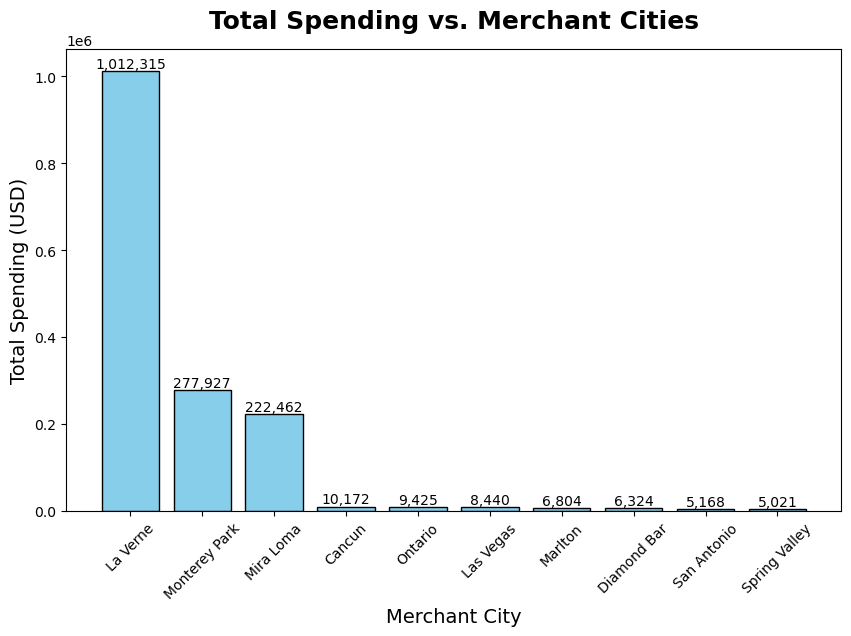

In [10]:
cities = city_spendings_ranked["Merchant City"]
total_spendings = city_spendings_ranked["Amount"]

plt.figure(figsize=(10, 6))
bars = plt.bar(cities, total_spendings, color="skyblue", edgecolor="black")

plt.title("Total Spending vs. Merchant Cities", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Merchant City", fontsize=14)
plt.ylabel("Total Spending (USD)", fontsize=14)

plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, height,
        f"{height:,.0f}",
        ha="center", va="bottom", fontsize=10
    )

plt.show()

#### Saatlik Harcama Dağılımı

In [11]:
time_amount = merged_df[["Time","Amount"]].groupby("Time", as_index=False).sum()
time_amount

,Time,Amount
0,00:01,243.74
1,00:03,97.01
2,00:06,1.00
3,00:07,244.57
4,00:08,297.55
...,...,...
1139,23:52,257.38
1140,23:53,130.58
1141,23:54,296.92
1142,23:56,128.94


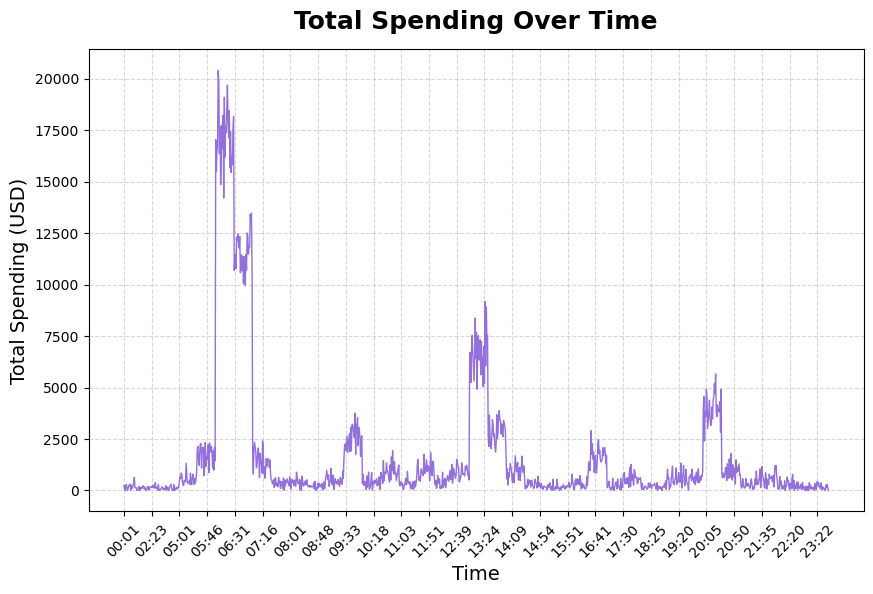

In [12]:
time = time_amount["Time"]
total_spendings = time_amount["Amount"]

plt.figure(figsize=(10, 6))
plt.plot(time,total_spendings,color="mediumpurple",linewidth=1)

plt.title("Total Spending Over Time", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Total Spending (USD)", fontsize=14)

plt.xticks(ticks=range(0, len(time), 45), labels=time[::45], rotation=45)
plt.grid(linestyle = "--", alpha=0.5)
plt.show()


#### Cinsiyete göre harcama

In [13]:
gender_amount = merged_df[["Gender","Amount"]].groupby("Gender", as_index=False).sum()
gender_amount

,Gender,Amount
0,Female,954192.24
1,Male,914567.58


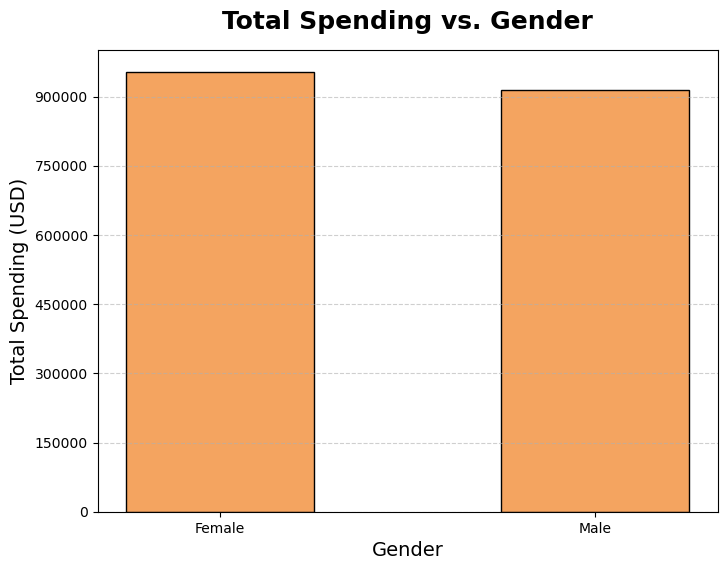

In [14]:
genders = gender_amount["Gender"]
total_spendings = gender_amount["Amount"]

plt.figure(figsize=(8, 6))
plt.bar(genders, total_spendings, color="sandybrown", edgecolor="black", width = 0.5)

plt.title("Total Spending vs. Gender", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Total Spending (USD)", fontsize=14)

y_max = max(total_spendings)
yticks = list(range(0, int(y_max), 150000))
plt.yticks(yticks)

plt.ylim(0, y_max * 1.05)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

#### Gelire Göre Harcama

İlk olarak dolar işaretinden kurtulup bu sütunu integer data tipine çevirmeliyiz gruplama işlemi yapabilmek için.

In [15]:
merged_df["Yearly Income - Person"] = merged_df["Yearly Income - Person"].str.replace("$","").astype(int)
merged_df

,User,Time,Amount,Merchant City,Current Age,Gender,Yearly Income - Person
0,102,06:21,2.08,La Verne,75,Male,22158
1,435,06:42,5.59,Monterey Park,26,Female,30049
2,348,06:22,132.12,Monterey Park,82,Female,41793
3,270,17:45,60.91,Monterey Park,32,Female,41106
4,106,06:23,118.74,La Verne,56,Female,66230
...,...,...,...,...,...,...,...
19357,124,16:16,74.82,La Verne,45,Female,25723
19358,339,11:58,55.36,La Verne,24,Male,31006
19359,160,16:53,100.80,Hawthorne,63,Female,26661
19360,28,16:30,290.10,La Verne,41,Male,32531


Bu noktada her bir kişiyi ayrı olarak incelemek mümkün olduğu gibi, aynı gelire sahip insanların harcamalarının toplanarak analiz edildiği bir grafik çizmek de mümkün. Burada analiz amacına göre hangisini seçeceğimize karar verebiliriz. Bu projede bireysel gelirleri ayrı ayrı ele almanın daha doğru olduğunu düşünerek hem ayrık idlerine göre (User) hem de  yıllık gelirlerine göre bir gruplama yaptım.

In [16]:
amount_income = merged_df[["User","Amount", "Yearly Income - Person"]]
amount_income = amount_income.groupby(["User","Yearly Income - Person"], as_index = False).sum()
amount_income = amount_income[["Amount", "Yearly Income - Person"]]

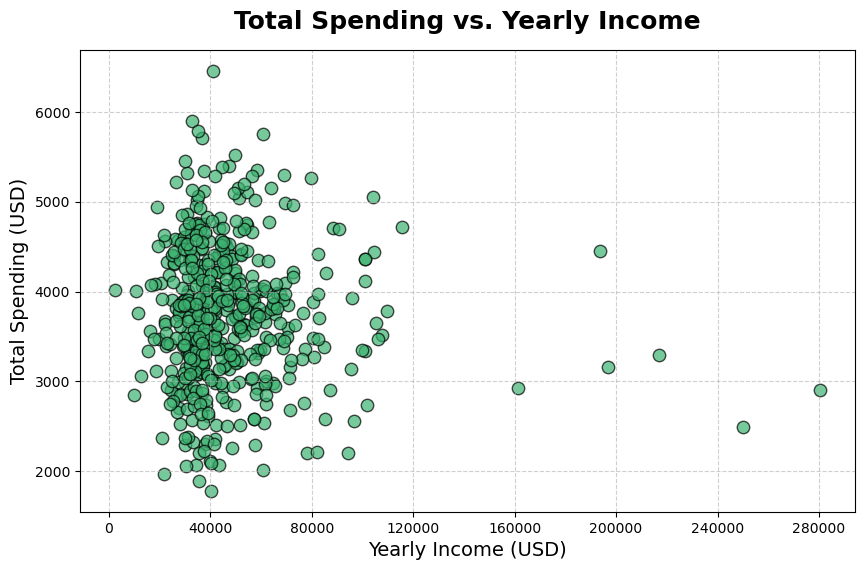

In [17]:
income = amount_income["Yearly Income - Person"]
total_spending = amount_income["Amount"]
plt.figure(figsize=(10, 6))

plt.scatter(income, total_spending, color="mediumseagreen", edgecolor="black",alpha=0.7,s=80)

plt.title("Total Spending vs. Yearly Income", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Yearly Income (USD)", fontsize=14)
plt.ylabel("Total Spending (USD)", fontsize=14)

plt.xticks(list(range(0,max(income),40000)))

plt.grid(linestyle="--", alpha=0.6)

plt.show()

#### Chatgpt önerisi: Yaşa göre harcama grafiği

In [18]:
amount_age = merged_df[["Amount", "Current Age"]]
amount_age = amount_age.groupby("Current Age", as_index = False).sum()

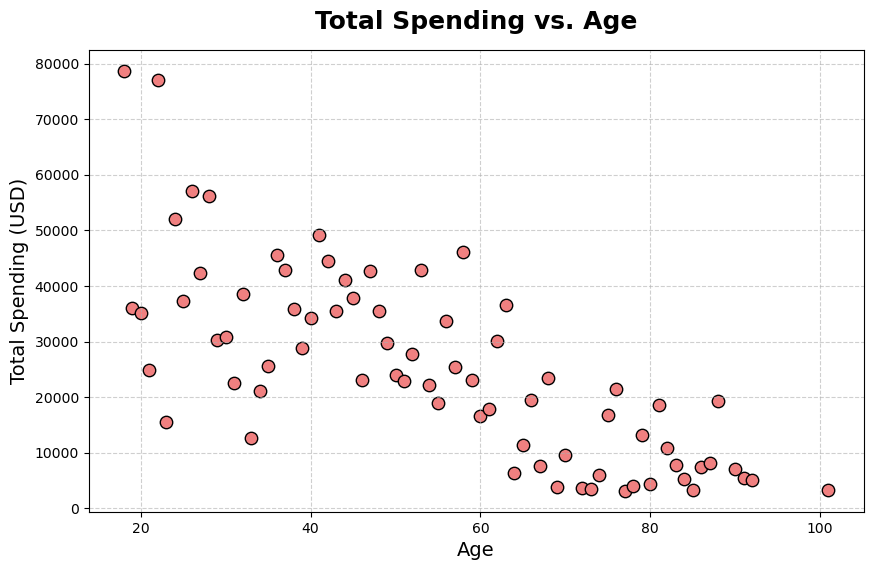

In [19]:
age = amount_age["Current Age"]
total_spending = amount_age["Amount"]
plt.figure(figsize=(10, 6))

plt.scatter(age, total_spending, color="lightcoral", edgecolor="black",s=80)

plt.title("Total Spending vs. Age", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Total Spending (USD)", fontsize=14)


plt.grid(linestyle="--", alpha=0.6)

plt.show()

### 3. Görsel Veri Yorumlama
#### En fazla harcama yapılan şehirler:
Verilere göre ilk üç şehir ile geri kalan şehirler arasında harcama açısından ciddi bir fark varken; aynı zamanda en çok harcama yapılan şehir de diğer tüm şehirlere göre çok daha önde görünüyor. La Verne şehrinde çok daha büyük miktarda para çıkışı gözlemleniyor ancak bu o şehirde harcamaya meyilli daha fazla insan var verisini doğurmaz çünkü popülasyonlar veya alım gücü gibi önemli etkenleri dikkate alınmadık.


#### Saatlik harcama dağılımı:
Grafiğin belirli saat aralıklarında ani bir yükseliş yaptığını gözlemliyoruz. En sık satış yapılan saat aralıklarını çoktan aza doğru 

**1)** 06.00-07.00

**2)** 13.00-14.00

**3)** 20.00-20.30

**4)** 09.30-09.50

**5)** 16.15-17.00

şeklinde sıralayabiliriz. En sık satış yapılan saat ise 06.00 civarında (net değer kolaylıkla bulunabilir ancak anlamlı bir veriye hizmet etmez). 22.30-05.00 aralıklarında ise satış neredeyse hiç yapılmayacak kadar az gerçekleşiyor.


#### Cinsiyete göre harcama:
Arada fazla fark olmamakla birlikte kadınların erkeklerden daha fazla harcama yaptığı görülüyor.


#### Gelire göre harcama:
Nüfusun büyük çoğunluğunun 35000-80000 gelir bandında olduğunu dikkate alırsak, bu nüfus yoğunluğunda en fazla harcamanın bu gruptan çıkması çok sağlıklı bir veri sunmayabilir. Nihayetinde 40000 maaş alan 5 kişi varsa ve her biri 2000 harcama yapıyorsa, 280000 gelirli tek bir kişinin yaptığı 10000'lik harcamaya denk gelecek bir veri sunacaktır. Dolayısıyla 40000 civarı gelire sahip kişi sayısı fazlalığından ötürü bu grubun yaptığı total harcamalar da veri setimizin en yoğun harcamaları oluyor diyebiliriz.


#### Yaşa göre harcama:
Yaş arttıkça harcama yapma eğiliminin azaldığını gözlemliyoruz.

Genel olarak:
- En fazla harcama yapılan şehir: La Verne; saat dilimi: 06.00-07.00; cinsiyet: Kadın; gelir grubunu: 30,000-50,000.